In [8]:
import numpy as np

from feature_selection import *

import pandas as pd
import seaborn as sns

from scipy.spatial import distance
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [9]:
df_ionizable_train: pd.DataFrame = pd.read_csv("../../Data/ionizable_dataset_72_train_divprio.csv", delimiter=';')
df_ionizable_test: pd.DataFrame = pd.read_csv("../../Data/ionizable_dataset_72_test_divprio.csv", delimiter=';')

df_ionizable_train = scale_data(df_ionizable_train)
df_ionizable_test = scale_data(df_ionizable_test)


df_neutral_train: pd.DataFrame = pd.read_csv("../../Data/neutral_dataset_111_train_divprio.csv", delimiter=';')
df_neutral_test: pd.DataFrame = pd.read_csv("../../Data/neutral_dataset_111_test_divprio.csv", delimiter=';')

df_neutral_train = scale_data(df_neutral_train)
df_neutral_test = scale_data(df_neutral_test)

df_full_train: pd.DataFrame = pd.read_csv("../../Data/full_dataset_train_divprio.csv", delimiter=';')
df_full_test: pd.DataFrame = pd.read_csv("../../Data/full_dataset_test_divprio.csv", delimiter=';')

df_full_train = scale_data(df_full_train)
df_full_test = scale_data(df_full_test)


df_all =  [df_ionizable_train, df_ionizable_test, df_neutral_train, df_neutral_test, df_full_train, df_full_test]

       Log_MP_RATIO        apol         ASA        ASA+        ASA-  \
count     58.000000   58.000000   58.000000   58.000000   58.000000   
mean      -0.193418   48.931856  546.808675  349.373759  194.552224   
std        0.705376   15.945415  119.585499  106.296749   70.212878   
min       -2.259637   18.059965  295.840610  118.873230   68.862923   
25%       -0.431798   39.435989  475.798502  275.327828  149.002465   
50%       -0.023676   48.002051  538.751740  361.514160  182.802255   
75%        0.339801   53.987316  605.620958  410.803538  232.416348   
max        0.793092  121.987920  896.699710  674.181880  449.023770   

            ASA_H       ASA_P      a_acc     a_acid      a_aro  ...  \
count   58.000000   58.000000  58.000000  58.000000  58.000000  ...   
mean   394.809622  151.999057   2.051724   0.637931   8.620690  ...   
std    121.114319   90.307555   2.081012   1.037850   4.221198  ...   
min     97.029968   39.299633   0.000000   0.000000   0.000000  ...   
25%  

# Low variance features
We try to detect every feature that has a variance below the threshold

## IONIZABLE

In [10]:
print("===== TRAIN =====")
df_ionizable_train_lv, col_ionizable_train_lv = remove_low_variance(df_ionizable_train, variance_threshold=0)
print("===== TEST =====")
df_ionizable_test_lv, col_ionizable_test_lv = remove_low_variance(df_ionizable_test, variance_threshold=0)

col_ionizable_lv: set = set(col_ionizable_train_lv) & set(col_ionizable_test_lv)
print(col_ionizable_lv)
print("length of the feature that are common for train and test: ", len(col_ionizable_lv))


df_ionizable_train = df_ionizable_train.drop(list(col_ionizable_lv), axis=1)
df_ionizable_test = df_ionizable_test.drop(list(col_ionizable_lv), axis=1)

===== TRAIN =====
(58, 478)
(58, 436)
===== TEST =====
(14, 478)
(14, 419)
{'MACCS(-18)', 'MACCS(-39)', 'MACCS(-31)', 'MACCS(-10)', 'MACCS(--9)', 'MACCS(--6)', 'a_nP', 'MACCS(-20)', 'MACCS(-30)', 'vsurf_Wp8', 'MACCS(--7)', 'nmol', 'MACCS(-14)', 'MACCS(-21)', 'MACCS(-68)', 'MACCS(-40)', 'MACCS(-48)', 'MACCS(--5)', 'MACCS(-49)', 'MACCS(-27)', 'MACCS(--3)', 'MACCS(-26)', 'MACCS(166)', 'MACCS(-29)', 'MACCS(-17)', 'MACCS(-15)', 'MACCS(-69)', 'E_stb', 'a_nI', 'a_nB', 'MACCS(--4)', 'MACCS(--1)', 'a_nBr', 'MACCS(-12)', 'MACCS(-44)', 'MACCS(-46)', 'MACCS(--2)', 'MACCS(-35)', 'MACCS(-23)'}
length of the feature that are common for train and test:  39


## NEUTRAL

In [11]:
print("===== TRAIN =====")
df_neutral_train_lv, col_neutral_train_lv = remove_low_variance(df_neutral_train, variance_threshold=0)
print("===== TEST =====")
df_neutral_test_lv, col_neutral_test_lv = remove_low_variance(df_neutral_test, variance_threshold=0)

col_neutral_lv: set = set(col_neutral_train_lv) & set(col_neutral_test_lv)
print(col_neutral_lv)
print("length of the feature that are common for train and test: ", len(col_neutral_lv))

df_neutral_train = df_neutral_train.drop(list(col_neutral_lv), axis=1)
df_neutral_test = df_neutral_test.drop(list(col_neutral_lv), axis=1)

===== TRAIN =====
(89, 478)
(89, 442)
===== TEST =====
(22, 478)
(22, 339)
{'MACCS(-18)', 'MACCS(-24)', 'MACCS(-39)', 'MACCS(-31)', 'MACCS(-10)', 'MACCS(--9)', 'MACCS(--6)', 'a_nP', 'MACCS(-20)', 'MACCS(-30)', 'MACCS(--7)', 'nmol', 'MACCS(-14)', 'MACCS(-68)', 'MACCS(-34)', 'MACCS(-40)', 'FCharge', 'MACCS(-48)', 'MACCS(--5)', 'MACCS(-49)', 'MACCS(-27)', 'MACCS(--3)', 'MACCS(166)', 'MACCS(-29)', 'MACCS(-15)', 'E_stb', 'a_nI', 'a_nB', 'MACCS(--4)', 'MACCS(-41)', 'MACCS(-13)', 'MACCS(--1)', 'MACCS(-12)', 'MACCS(-44)', 'MACCS(--2)', 'MACCS(-35)'}
length of the feature that are common for train and test:  36


## FULL

In [12]:
print("===== TRAIN =====")
df_full_train_lv, col_full_train_lv = remove_low_variance(df_full_train, variance_threshold=0)
print("===== TEST =====")
df_full_test_lv, col_full_test_lv = remove_low_variance(df_full_test, variance_threshold=0)

col_full_lv: set = set(col_full_train_lv) & set(col_full_test_lv)
print(col_full_lv)
print("length of the feature that are common for train and test: ", len(col_full_lv))

df_full_train = df_full_train.drop(list(col_full_lv), axis=1)
df_full_test = df_full_test.drop(list(col_full_lv), axis=1)

===== TRAIN =====
(146, 478)
(146, 448)
===== TEST =====
(37, 478)
(37, 368)
{'MACCS(-18)', 'MACCS(-39)', 'MACCS(-31)', 'MACCS(-10)', 'MACCS(--9)', 'MACCS(--6)', 'a_nP', 'MACCS(-20)', 'MACCS(-30)', 'MACCS(--7)', 'nmol', 'MACCS(-14)', 'MACCS(-68)', 'MACCS(-40)', 'MACCS(-48)', 'MACCS(--5)', 'MACCS(-27)', 'MACCS(--3)', 'MACCS(166)', 'MACCS(-29)', 'MACCS(-15)', 'E_stb', 'a_nI', 'a_nB', 'MACCS(--4)', 'MACCS(--1)', 'MACCS(-12)', 'MACCS(-44)', 'MACCS(--2)', 'MACCS(-35)'}
length of the feature that are common for train and test:  30


# High correlation feature

## IONIZABLE

(58, 440)


/home/penpen/anaconda3/envs/science/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


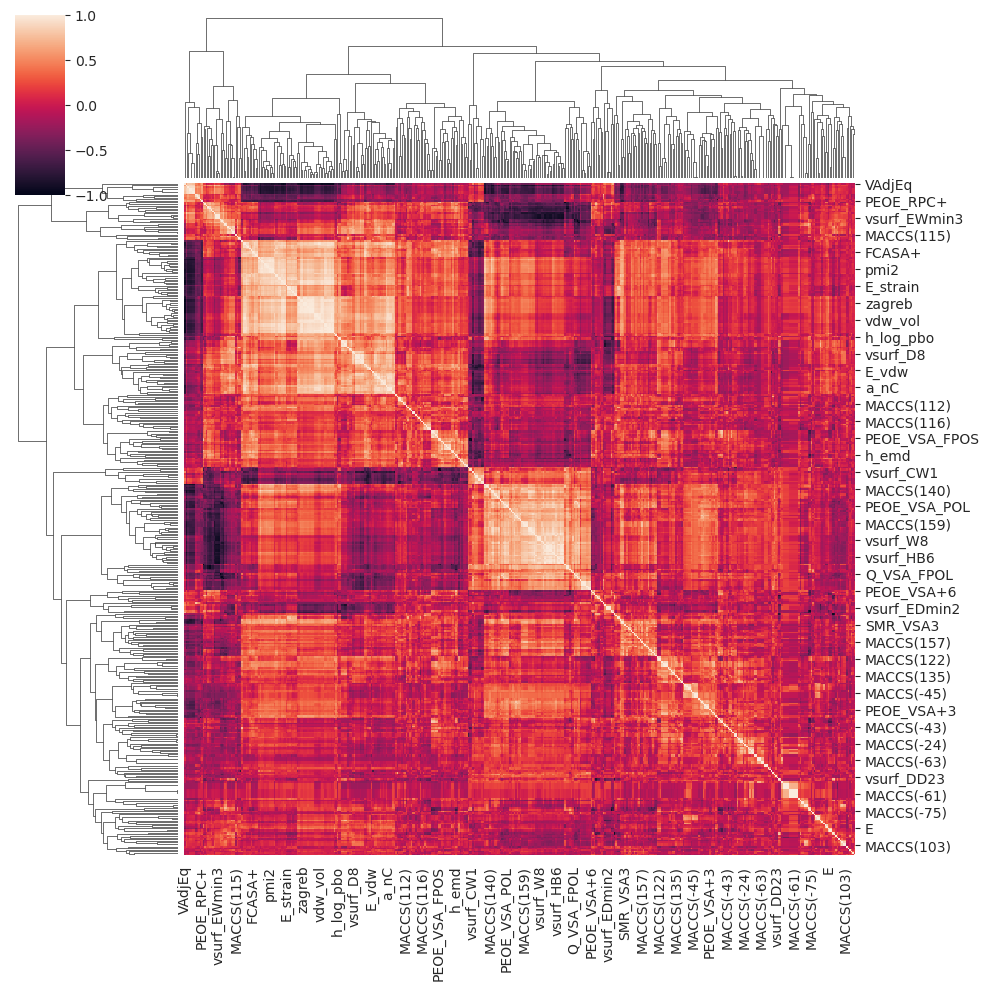

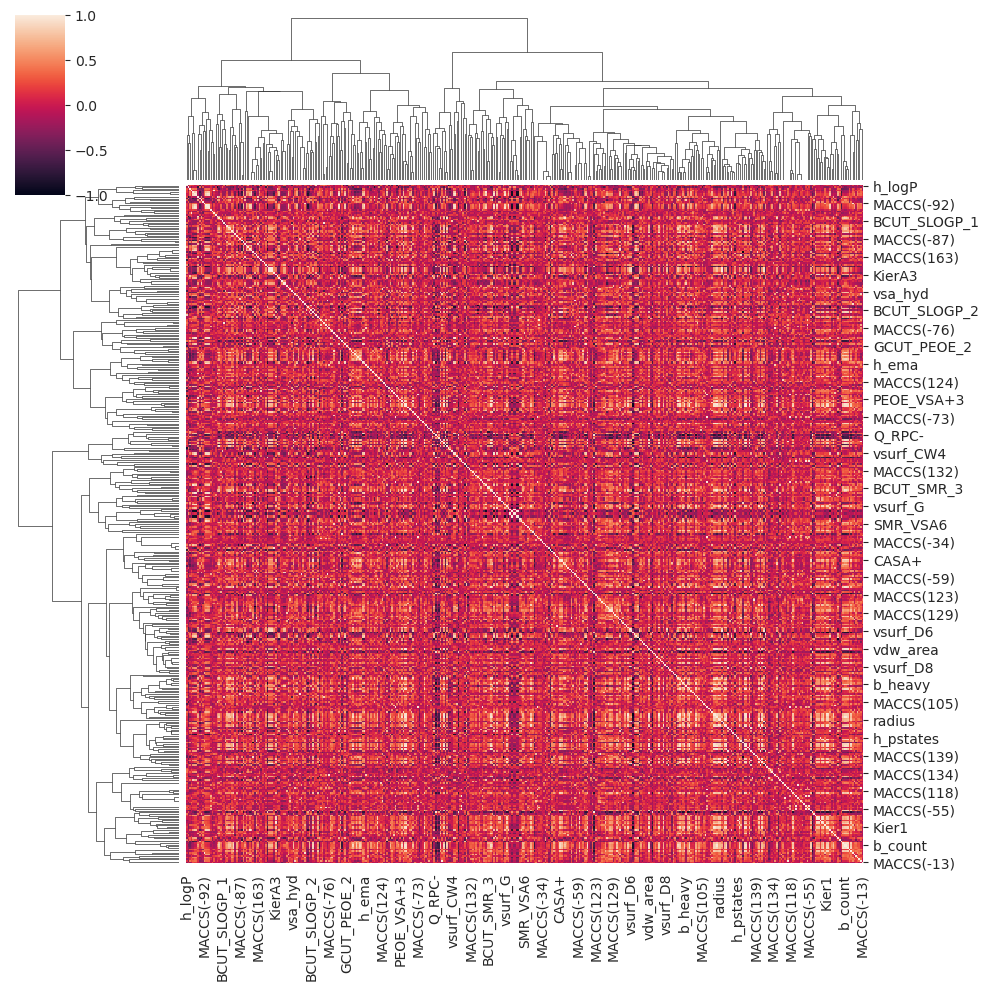

In [19]:
print(df_ionizable_train.shape)

df_ionizable_train_reg = mutual_info_reg(df_ionizable_train)
df_ionizable_test_reg = mutual_info_reg(df_ionizable_test)



# f, ax = plt.subplots(figsize=(12,10))
sns.clustermap(df_ionizable_train_reg, figsize=(10,10))


df_ionizable_train_reg_2: pd.DataFrame = df_ionizable_train.corr().dropna(how="all", axis=1).dropna(how="all")


df_ionizable_test_reg_array: np.array = np.asarray(df_ionizable_test_reg)





row_linkage = hierarchy.linkage(distance.pdist(df_ionizable_test_reg_array), method="average")
column_linkage = hierarchy.linkage(distance.pdist(df_ionizable_test_reg_array.T), method="average")


# f, ax = plt.subplots(figsize=(12,10))
sns.clustermap(df_ionizable_train_reg, row_linkage=row_linkage, col_linkage=column_linkage, figsize=(10,10))

# # source: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# def heatmap(x, y, size):
#     fig, ax = plt.subplots(figsize=(12,10))
#
#     x_labels = [v for v in sorted(x.unique())]
#     y_labels = [v for v in sorted(y.unique())]
#     x_to_num = {p[1]:p[0] for p in enumerate(x_labels)}
#     y_to_num = {p[1]:p[0] for p in enumerate(y_labels)}
#
#     size_scale = 500
#     ax.scatter(
#         x=x.map(x_to_num),
#         y=y.map(y_to_num),
#         s=size * size_scale,
#         marker='s'
#     )
#
#
#     ax.set_xticks([x_to_num[v] for v in x_labels])
#     ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
#     ax.set_yticks([y_to_num[v] for v in y_labels])
#     ax.set_yticklabels(y_labels)
#
# df_ionizable_train_reg = pd.melt(df_ionizable_train_reg.reset_index(), id_vars="index")
# df_ionizable_train_reg.columns = ["x", "y", "value"]
#
#
#
#
# heatmap(
#     x=df_ionizable_train_reg["x"],
#     y=df_ionizable_train_reg["y"],
#     size=df_ionizable_train_reg["value"].abs()
# )